# aass



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 '2018.ipynb',
 '2019.ipynb',
 '2020.ipynb',
 'hotel_revenue.xlsx',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [3]:
filter_path =("hotel_revenue.xlsx")
dataframes = pd.read_excel(filter_path,sheet_name=None)
print(dataframes)

{'2018':               hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            1         85               2018   
1      Resort Hotel            1         75               2018   
2      Resort Hotel            1         23               2018   
3      Resort Hotel            1         60               2018   
4      Resort Hotel            1         96               2018   
...             ...          ...        ...                ...   
21991    City Hotel            1         24               2018   
21992    City Hotel            1          1               2018   
21993    City Hotel            1         66               2018   
21994    City Hotel            1         54               2018   
21995    City Hotel            1         54               2018   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July            

In [4]:
df=dataframes["2018"]

In [5]:
for i in df.describe(include="object").columns:
    print(i)
    print(df[i].unique())
    for i in df.describe(include="object").columns:
        print(i)
        print(df[i].unique())

hotel
['Resort Hotel' 'City Hotel']
hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December']
meal
['BB' 'HB' 'FB' 'Undefined' 'SC']
country
['PRT' 'IRL' 'ESP' 'DEU' 'CN' 'ITA' nan 'GBR' 'BEL' 'RUS' 'FRA' 'MOZ'
 'IRN' 'BRA' 'KOR' 'AGO' 'USA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'CHE' 'GRC'
 'NLD' 'DNK' 'SWE' 'AUS' 'EST' 'CZE' 'FIN' 'BWA' 'LUX' 'SVN' 'ALB' 'IND'
 'CHN' 'MEX' 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU'
 'TUR' 'ZAF' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'CRI' 'NZL' 'HUN' 'IDN'
 'HRV' 'KAZ' 'THA' 'COL' 'DOM' 'MKD' 'MYS' 'NGA' 'VEN' 'GIB' 'ARM' 'JPN'
 'LKA' 'TUN' 'STP' 'BGR' 'TWN' 'AZE' 'LBN' 'SVK' 'CMR' 'SGP' 'SEN' 'PER'
 'EGY' 'SAU' 'KNA' 'JOR' 'KWT' 'ETH' 'PHL' 'LIE' 'MMR' 'IRQ' 'PAN' 'GEO'
 'TMP' 'MUS' 'ECU']
market_segment
['Online TA' 'Offline TA/TO' 'Direct' 'Corporate' 'Groups' 'Complementary'
 'Undefined']
distribution_channel
['TA/TO' 'Direct' 'Corporate' 'Undefined' 'GDS']
reserved_room_type
['A' '

In [6]:
cancelation_count = df["is_canceled"].value_counts()

not_canceled = cancelation_count[0]
canceled = cancelation_count[1]
print(not_canceled-canceled)

5712


In [7]:

cancelation_by_deposit = df.groupby("deposit_type")["is_canceled"].mean().sort_values(ascending = False)
cancelation_by_deposit

deposit_type
Non Refund    0.997546
No Deposit    0.244693
Refundable    0.000000
Name: is_canceled, dtype: float64

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df["total_stays"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
stay_cancellation_rate = df.groupby("total_stays")["is_canceled"].mean().sort_values(ascending=False)
stay_cancellation_rate


total_stays
27    1.000000
23    1.000000
33    1.000000
20    1.000000
16    0.909091
2     0.510347
19    0.500000
18    0.500000
17    0.500000
21    0.400000
4     0.370728
3     0.342142
12    0.340426
28    0.333333
6     0.332432
5     0.316000
8     0.313869
7     0.287802
9     0.284884
14    0.275449
1     0.247611
13    0.215686
10    0.196429
11    0.180556
22    0.166667
15    0.153846
0     0.006494
30    0.000000
29    0.000000
46    0.000000
60    0.000000
Name: is_canceled, dtype: float64

In [10]:
df["arrival_date"] = pd.to_datetime(
    df["arrival_date_month"].astype(str) + "-" +
    df["arrival_date_day_of_month"].astype(str) + "-" +
    df["arrival_date_year"].astype(str)).dt.day_name()


In [11]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,arrival_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06,3,Sunday
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22,3,Sunday


In [12]:
cancellation_counts = df['is_canceled'].value_counts()
canceled = cancellation_counts[1]
not_canceled = cancellation_counts[0]
difference = not_canceled - canceled
print(f"Total Canceled Bookings: {canceled}")
print(f"Total Non-Canceled Bookings: {not_canceled}")
print(f"Difference between Non-Canceled and Canceled: {difference}")


Total Canceled Bookings: 8142
Total Non-Canceled Bookings: 13854
Difference between Non-Canceled and Canceled: 5712


In [13]:
cancellation_rate = df.groupby('previous_cancellations')['is_canceled'].mean()

print("Cancellation Rate based on Previous Cancellations:")
print(cancellation_rate)

Cancellation Rate based on Previous Cancellations:
previous_cancellations
0     0.213712
1     0.992490
2     0.548387
3     1.000000
11    1.000000
14    1.000000
19    1.000000
21    1.000000
24    1.000000
25    1.000000
26    1.000000
Name: is_canceled, dtype: float64


In [14]:
market_segment_cancellation_rate = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False).tail(6)

print("Cancellation Rate by Market Segment:")
print(market_segment_cancellation_rate)


Cancellation Rate by Market Segment:
market_segment
Groups           0.630000
Offline TA/TO    0.340023
Online TA        0.266829
Corporate        0.187020
Direct           0.151685
Complementary    0.090909
Name: is_canceled, dtype: float64


In [15]:
deposit_type_cancellation_rate = df.groupby('deposit_type')['is_canceled'].mean()

print("Cancellation Rate by Deposit Type:")
print(deposit_type_cancellation_rate)


Cancellation Rate by Deposit Type:
deposit_type
No Deposit    0.244693
Non Refund    0.997546
Refundable    0.000000
Name: is_canceled, dtype: float64


In [16]:
special_requests_cancellation_rate = df.groupby('total_of_special_requests')['is_canceled'].mean()

print("Cancellation Rate based on Total of Special Requests:")
print(special_requests_cancellation_rate)

Cancellation Rate based on Total of Special Requests:
total_of_special_requests
0    0.440933
1    0.196120
2    0.236444
3    0.195822
4    0.090909
5    0.000000
Name: is_canceled, dtype: float64


In [17]:
df['room_type_mismatch'] = df['reserved_room_type'] != df['assigned_room_type']
room_type_mismatch_cancellation_rate = df.groupby('room_type_mismatch')['is_canceled'].mean()

print("Cancellation Rate based on Room Type Mismatch:")
print(room_type_mismatch_cancellation_rate)

Cancellation Rate based on Room Type Mismatch:
room_type_mismatch
False    0.441079
True     0.034411
Name: is_canceled, dtype: float64


In [18]:
customer_type_cancellation_rate = df.groupby('customer_type')['is_canceled'].mean()

print("Cancellation Rate by Customer Type:")
print(customer_type_cancellation_rate)


Cancellation Rate by Customer Type:
customer_type
Contract           0.399172
Group              0.177083
Transient          0.364710
Transient-Party    0.373040
Name: is_canceled, dtype: float64


In [19]:
adults_cancellation_rate = df.groupby('adults')['is_canceled'].mean()

print("Cancellation Rate based on Number of Adults:")
print(adults_cancellation_rate)

children_cancellation_rate = df.groupby('children')['is_canceled'].mean()

print("Cancellation Rate based on Number of Children:")
print(children_cancellation_rate)

babies_cancellation_rate = df.groupby('babies')['is_canceled'].mean()

print("Cancellation Rate based on Number of Babies:")
print(babies_cancellation_rate)


Cancellation Rate based on Number of Adults:
adults
0     0.136364
1     0.263017
2     0.403965
3     0.162996
4     0.250000
5     1.000000
6     1.000000
10    1.000000
20    1.000000
26    1.000000
27    1.000000
40    1.000000
50    1.000000
55    1.000000
Name: is_canceled, dtype: float64
Cancellation Rate based on Number of Children:
children
0.0     0.376785
1.0     0.163180
2.0     0.269321
3.0     0.200000
10.0    1.000000
Name: is_canceled, dtype: float64
Cancellation Rate based on Number of Babies:
babies
0    0.371896
1    0.195238
2    0.000000
9    0.000000
Name: is_canceled, dtype: float64


In [20]:
monthly_cancellation_rate = df.groupby('arrival_date_month')['is_canceled'].mean()

print("Cancellation Rate by Arrival Month:")
print(monthly_cancellation_rate)

Cancellation Rate by Arrival Month:
arrival_date_month
August       0.410903
December     0.333219
July         0.453530
November     0.207692
October      0.349405
September    0.409464
Name: is_canceled, dtype: float64


In [21]:
year_cancellation_rate = df.groupby(df['reservation_status_date'].dt.year)['is_canceled'].mean()

print("Cancellation Rate by Reservation Year:")
print(year_cancellation_rate)

Cancellation Rate by Reservation Year:
reservation_status_date
2014    1.00000
2018    0.37161
2019    0.00000
Name: is_canceled, dtype: float64


In [22]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
stay_length_cancellation_rate = df.groupby('total_stays')['is_canceled'].mean()

print("Cancellation Rate based on Length of Stay:")
print(stay_length_cancellation_rate)

Cancellation Rate based on Length of Stay:
total_stays
0     0.006494
1     0.247611
2     0.510347
3     0.342142
4     0.370728
5     0.316000
6     0.332432
7     0.287802
8     0.313869
9     0.284884
10    0.196429
11    0.180556
12    0.340426
13    0.215686
14    0.275449
15    0.153846
16    0.909091
17    0.500000
18    0.500000
19    0.500000
20    1.000000
21    0.400000
22    0.166667
23    1.000000
27    1.000000
28    0.333333
29    0.000000
30    0.000000
33    1.000000
46    0.000000
60    0.000000
Name: is_canceled, dtype: float64


In [23]:
distribution_channel_cancellation_rate = df.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)

print("Cancellation Rate by Distribution Channel:")
print(distribution_channel_cancellation_rate)

Cancellation Rate by Distribution Channel:
distribution_channel
Undefined    0.800000
TA/TO        0.409503
Corporate    0.255464
Direct       0.179174
GDS          0.000000
Name: is_canceled, dtype: float64


In [24]:
country_cancellation_rate = df.groupby('country')['is_canceled'].mean().sort_values(ascending=False)

print("Top 10 Countries by Cancellation Rate:")
print(country_cancellation_rate.head())

Top 10 Countries by Cancellation Rate:
country
PRT    0.569775
ITA    0.228519
MOZ    0.166667
IRL    0.136082
CN     0.090909
Name: is_canceled, dtype: float64


In [25]:
df['arrival_day_of_week'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                        df['arrival_date_month'].astype(str) + '-' + 
                                        df['arrival_date_day_of_month'].astype(str)).dt.day_name()

day_of_week_cancellation_rate = df.groupby('arrival_day_of_week')['is_canceled'].mean()

print("Cancellation Rate by Day of the Week:")
print(day_of_week_cancellation_rate)


Cancellation Rate by Day of the Week:
arrival_day_of_week
Friday       0.375514
Monday       0.417135
Saturday     0.308601
Sunday       0.312762
Thursday     0.257440
Tuesday      0.375064
Wednesday    0.462972
Name: is_canceled, dtype: float64


In [26]:
special_requests_cancellation_rate = df.groupby('total_of_special_requests')['is_canceled'].mean()

print("Cancellation Rate based on Number of Special Requests:")
print(special_requests_cancellation_rate)


Cancellation Rate based on Number of Special Requests:
total_of_special_requests
0    0.440933
1    0.196120
2    0.236444
3    0.195822
4    0.090909
5    0.000000
Name: is_canceled, dtype: float64


In [27]:
pivot = pd.pivot_table(df, values='is_canceled', index=['market_segment', 'customer_type'], aggfunc=np.mean)

print("Pivot Table of Cancellation Rate by Market Segment and Customer Type:")
pivot


Pivot Table of Cancellation Rate by Market Segment and Customer Type:


is_canceled
market_segment customer_type               
Complementary  Contract            0.000000
               Group               0.000000
               Transient           0.092593
               Transient-Party     0.000000
Corporate      Contract            0.181818
               Group               0.222222
               Transient           0.194785
               Transient-Party     0.176230
Direct         Contract            0.142857
               Group               0.333333
               Transient           0.148534
               Transient-Party     0.149660
Groups         Contract            1.000000
               Group               0.000000
               Transient           0.928941
               Transient-Party     0.442018
Offline TA/TO  Contract            0.087838
               Group               0.166667
               Transient           0.410905
               Transient-Party     0.334962
Online TA      Contract            0.225076
               Group               0.076923
               Transient           0.279159
               Transient-Party     0.295890
Undefined      Transient-Party     1.000000

In [28]:
country_mapping = {
    'PRT': 'Portugal',
    'IRL': 'Ireland',
    'ESP': 'Spain',
    'DEU': 'Germany',
    'CN': 'China',
    'ITA': 'Italy',
    'GBR': 'United Kingdom',
    'BEL': 'Belgium',
    'RUS': 'Russia',
    'FRA': 'France',
    'MOZ': 'Mozambique',
    'IRN': 'Iran',
    'BRA': 'Brazil',
    'KOR': 'South Korea',
    'AGO': 'Angola',
    'USA': 'United States',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'CHE': 'Switzerland',
    'GRC': 'Greece',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'FIN': 'Finland',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'ISR': 'Israel',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'CRI': 'Costa Rica',
    'NZL': 'New Zealand',
    'HUN': 'Hungary',
    'IDN': 'Indonesia',
    'HRV': 'Croatia',
    'KAZ': 'Kazakhstan',
    'THA': 'Thailand',
    'COL': 'Colombia',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'NGA': 'Nigeria',
    'VEN': 'Venezuela',
    'GIB': 'Gibraltar',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'TUN': 'Tunisia',
    'STP': 'Sao Tome and Principe',
    'BGR': 'Bulgaria',
    'TWN': 'Taiwan',
    'AZE': 'Azerbaijan',
    'LBN': 'Lebanon',
    'SVK': 'Slovakia',
    'CMR': 'Cameroon',
    'SGP': 'Singapore',
    'SEN': 'Senegal',
    'PER': 'Peru',
    'EGY': 'Egypt',
    'SAU': 'Saudi Arabia',
    'KNA': 'Saint Kitts and Nevis',
    'JOR': 'Jordan',
    'KWT': 'Kuwait',
    'ETH': 'Ethiopia',
    'PHL': 'Philippines',
    'LIE': 'Liechtenstein',
    'MMR': 'Myanmar',
    'IRQ': 'Iraq',
    'PAN': 'Panama',
    'GEO': 'Georgia',
    'TMP': 'East Timor',
    'MUS': 'Mauritius',
    'ECU': 'Ecuador'
}


In [29]:
df['country'] = df['country'].map(country_mapping)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,arrival_date,room_type_mismatch,arrival_day_of_week
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2018-05-06,3,Sunday,False,Sunday
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2018-04-22,3,Sunday,False,Sunday
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,Transient,123.0,0,0,Canceled,2018-06-23,4,Sunday,False,Sunday
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,Transient,107.0,0,2,Canceled,2018-05-11,7,Sunday,False,Sunday
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,Transient,108.3,0,2,Canceled,2018-05-29,10,Sunday,False,Sunday


In [30]:
correlation_matrix = df.corr(numeric_only=True)

print("Correlation with Cancellation:")
print(correlation_matrix['is_canceled'].sort_values(ascending=False))


Correlation with Cancellation:
is_canceled                       1.000000
lead_time                         0.459205
previous_cancellations            0.237623
adults                            0.069984
is_repeated_guest                 0.064222
company                           0.007880
arrival_date_day_of_month        -0.017219
stays_in_weekend_nights          -0.018796
babies                           -0.033679
adr                              -0.046861
total_stays                      -0.048853
days_in_waiting_list             -0.050202
children                         -0.053370
previous_bookings_not_canceled   -0.053959
stays_in_week_nights             -0.055907
arrival_date_week_number         -0.116572
booking_changes                  -0.183145
total_of_special_requests        -0.192030
required_car_parking_spaces      -0.195571
agent                            -0.197394
room_type_mismatch               -0.319584
arrival_date_year                      NaN
Name: is_canceled, dtyp

is_canceled
0    0.629842
1    0.370158
Name: proportion, dtype: float64


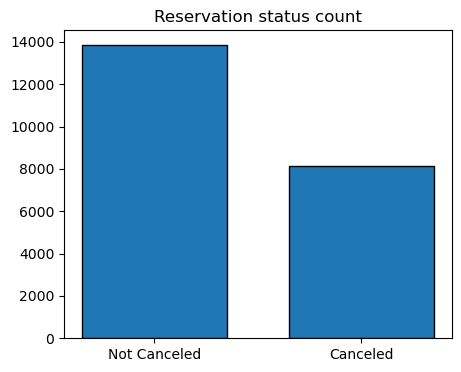

In [31]:
cancelled_perc = df["is_canceled"].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))

plt.title("Reservation status count")

plt.bar(["Not Canceled","Canceled"],df["is_canceled"].value_counts(),edgecolor="k",width = 0.7)
plt.show()

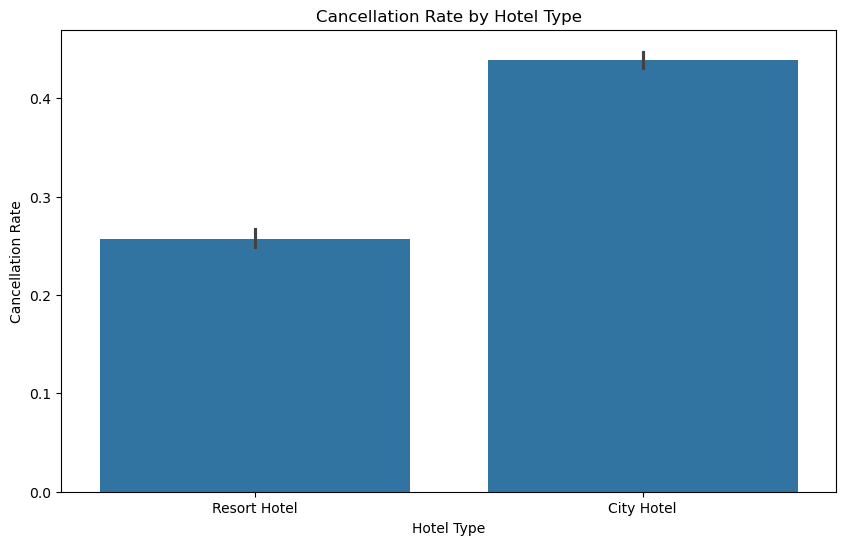

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='is_canceled', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

Text(0, 0.5, 'Cancellation Rate')

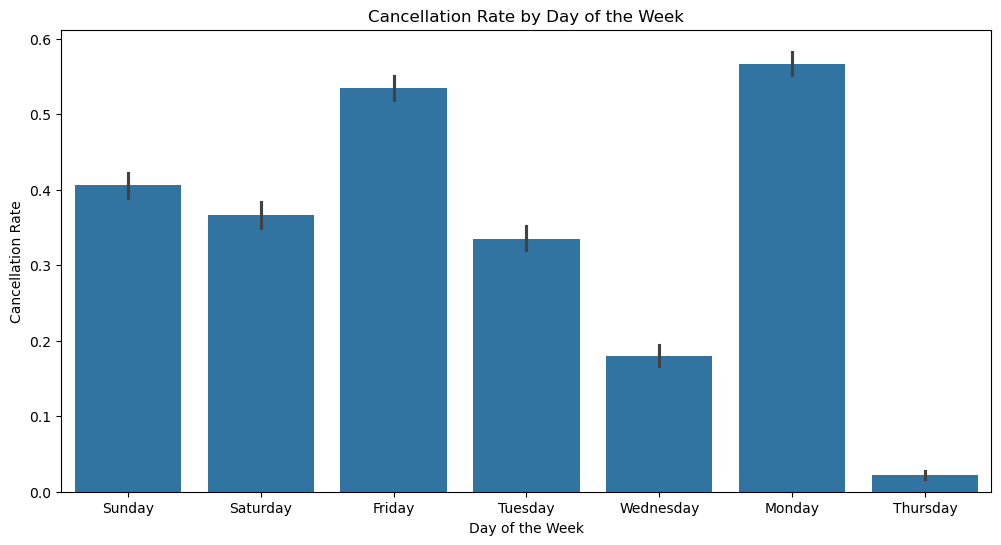

In [43]:
df['day_of_week'] = df['reservation_status_date'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='is_canceled', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Cancellation Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cancellation Rate')


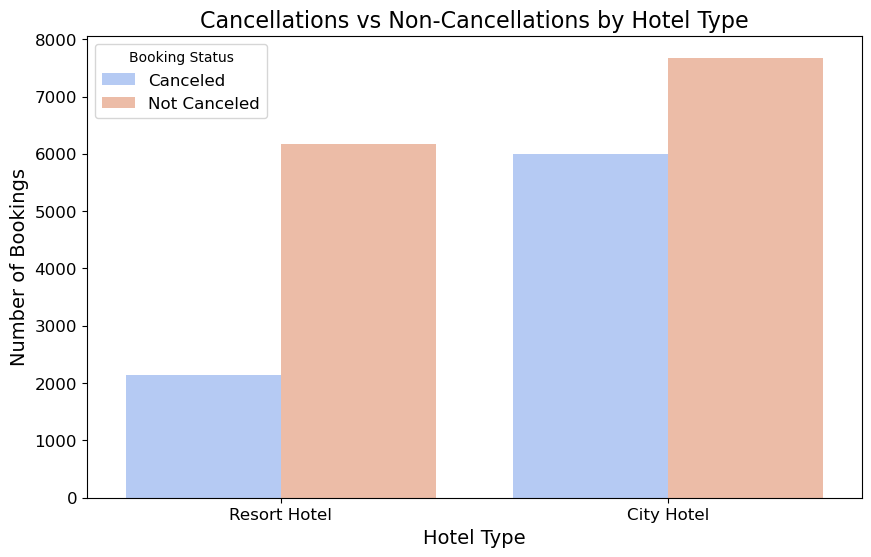

In [34]:
# Creating a new column to label cancellations and non-cancellations
df['Cancellation_Status'] = df['is_canceled'].apply(lambda x: 'Canceled' if x == 1 else 'Not Canceled')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hotel', hue='Cancellation_Status', palette='coolwarm')

# Adding titles and labels
plt.title('Cancellations vs Non-Cancellations by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.legend(title='Booking Status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

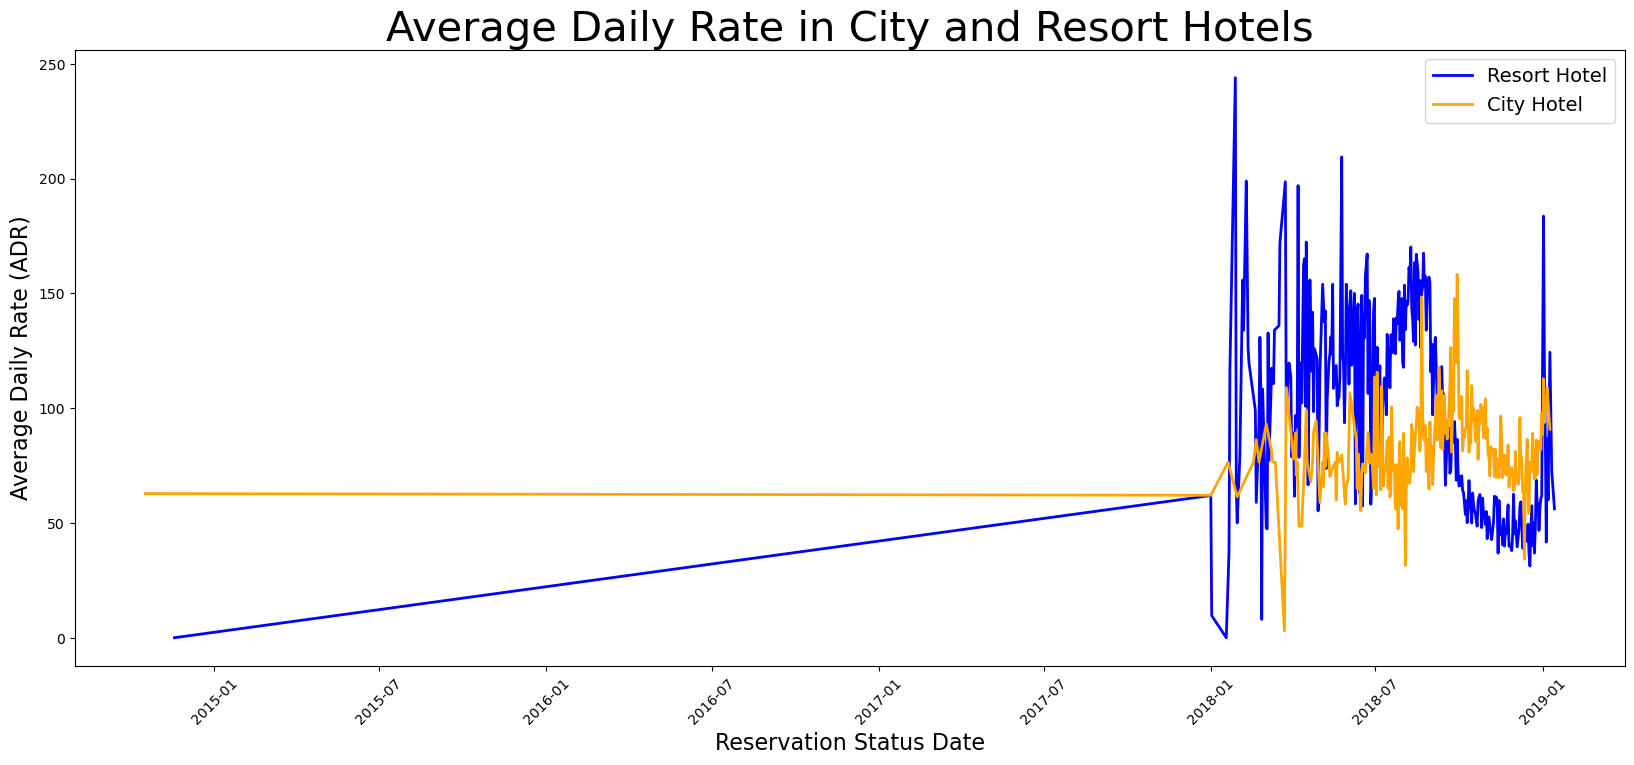

In [35]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

resort_hotel_cancellation = resort_hotel['is_canceled'].value_counts(normalize=True)
city_hotel_cancellation = city_hotel['is_canceled'].value_counts(normalize=True)

resort_hotel_adr = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_adr = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize=(20, 8))
plt.title("Average Daily Rate in City and Resort Hotels", fontsize=30)

plt.plot(resort_hotel_adr.index, resort_hotel_adr['adr'], label='Resort Hotel', color='blue', linewidth=2)

plt.plot(city_hotel_adr.index, city_hotel_adr['adr'], label='City Hotel', color='orange', linewidth=2)

plt.xlabel('Reservation Status Date', fontsize=16)
plt.ylabel('Average Daily Rate (ADR)', fontsize=16)
plt.xticks(rotation=45)
plt.legend(fontsize=14)

plt.show()


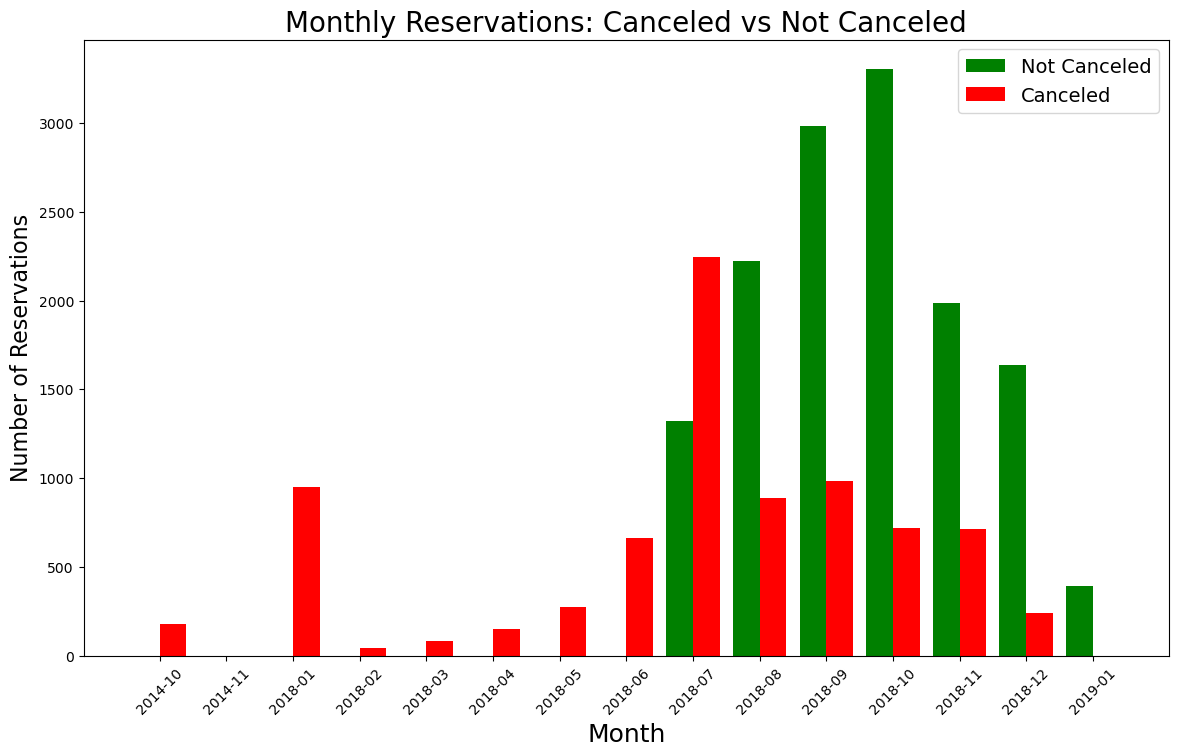

In [36]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['reservation_month'] = df['reservation_status_date'].dt.to_period('M')

monthly_reservations = df.groupby(['reservation_month', 'is_canceled']).size().unstack(fill_value=0)

monthly_reservations = monthly_reservations.reset_index()

monthly_reservations.columns = ['Month', 'Not Canceled', 'Canceled']

plt.figure(figsize=(14, 8))

bar_width = 0.4
index = np.arange(len(monthly_reservations['Month']))

plt.bar(index, monthly_reservations['Not Canceled'], bar_width, label='Not Canceled', color='green')

plt.bar(index + bar_width, monthly_reservations['Canceled'], bar_width, label='Canceled', color='red')

plt.title('Monthly Reservations: Canceled vs Not Canceled', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Reservations', fontsize=16)
plt.xticks(index + bar_width / 2, monthly_reservations['Month'].astype(str), rotation=45)
plt.legend(fontsize=14)

plt.show()

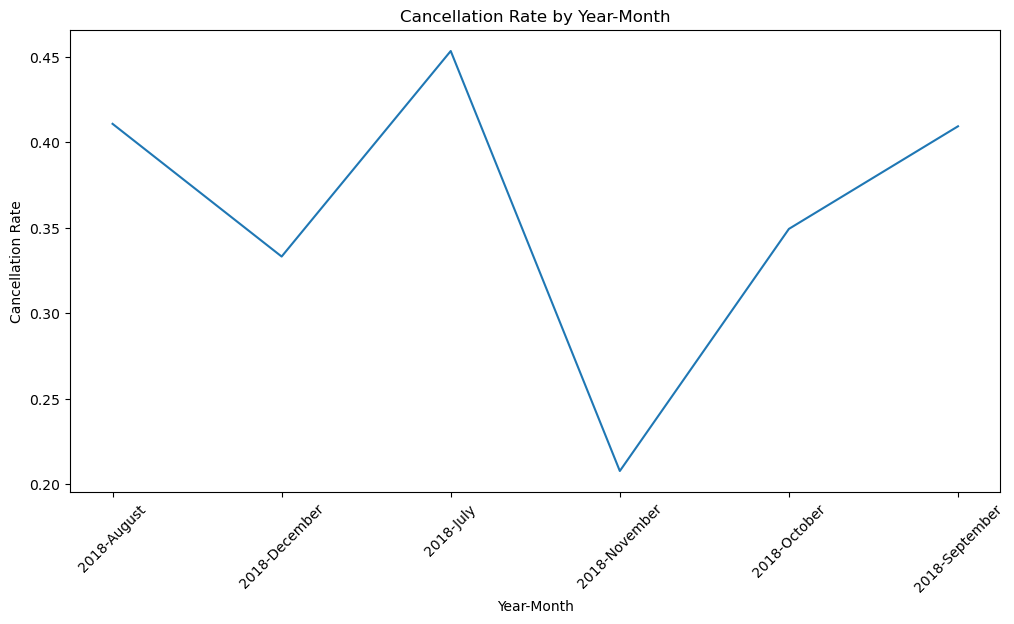

In [37]:
df['year_month'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month']

year_month_cancellation_rate = df.groupby('year_month')['is_canceled'].mean()

plt.figure(figsize=(12, 6))
year_month_cancellation_rate.plot()
plt.title('Cancellation Rate by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()


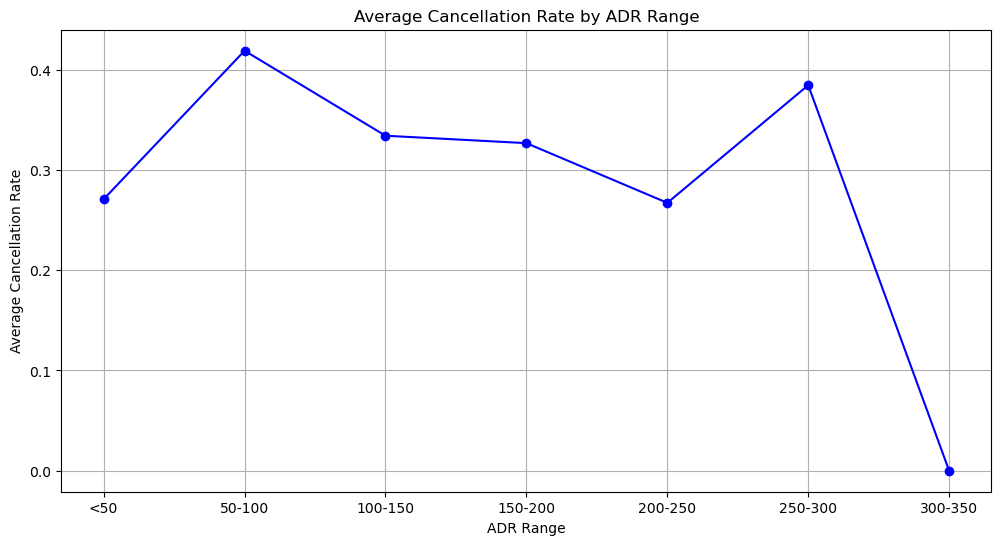

In [38]:
adr_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
adr_labels = ['<50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450+']

df['adr_bin'] = pd.cut(df['adr'], bins=adr_bins, labels=adr_labels, right=False)

cancellation_rates = df.groupby('adr_bin')['is_canceled'].mean()

plt.figure(figsize=(12, 6))
plt.plot(cancellation_rates.index, cancellation_rates.values, marker='o', linestyle='-', color='b')

plt.xlabel('ADR Range')
plt.ylabel('Average Cancellation Rate')
plt.title('Average Cancellation Rate by ADR Range')
plt.grid(True)

plt.show()

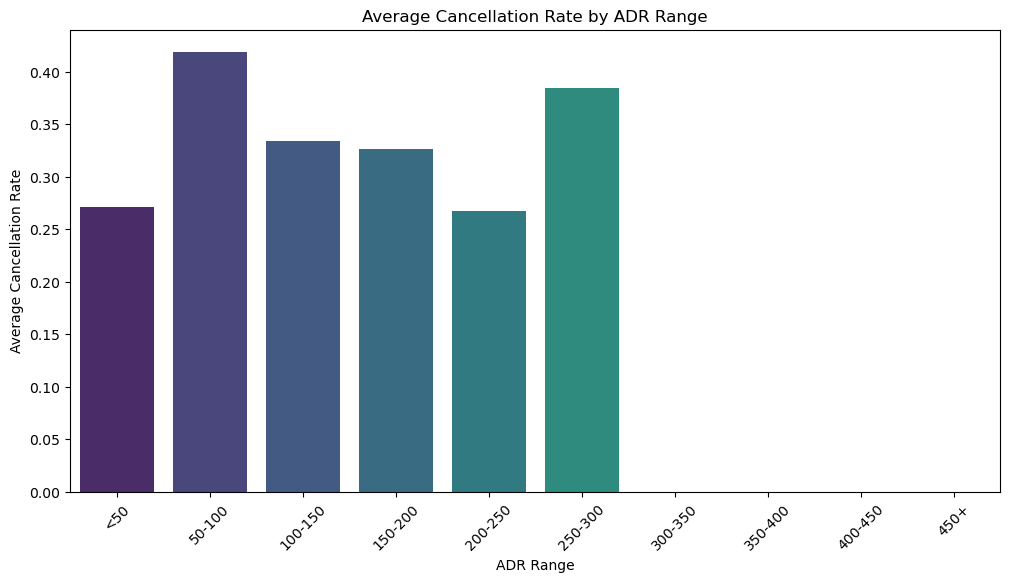

In [39]:
adr_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
adr_labels = ['<50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450+']

df['adr_bin'] = pd.cut(df['adr'], bins=adr_bins, labels=adr_labels, right=False)

cancellation_rates = df.groupby('adr_bin')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancellation_rates, x='adr_bin', y='is_canceled', palette='viridis')

plt.xlabel('ADR Range')
plt.ylabel('Average Cancellation Rate')
plt.title('Average Cancellation Rate by ADR Range')
plt.xticks(rotation=45)  
plt.grid(visible = False)

plt.show()

In [40]:
plt.figure(figsize = (10,6))

plt.pie(cancelation_by_country["is_canceled"],labels = cancelation_by_country["Country_Name"],autopct='%1.1f%%')
plt.title("Top 10 Countries by most Cancelation ")

plt.show()


NameError: name 'cancelation_by_country' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hotel', y='adr', palette='Set2')
plt.title('ADR Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', palette='Set1')
plt.title('Monthly Cancellations Count')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='lead_time', y='adr', hue='is_canceled', palette='coolwarm', alpha=0.6)
plt.title('ADR vs. Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('ADR')
plt.show()


In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

adr_over_time = df.groupby('reservation_status_date')['adr'].mean()

plt.figure(figsize=(12, 6))
adr_over_time.plot(kind='line', color='green')
plt.title('Average ADR Over Time')
plt.xlabel('Date')
plt.ylabel('Average ADR')
plt.show()


In [ ]:
booking_source_distribution = df['market_segment'].value_counts().sort_values(ascending = False).head(5)

plt.figure(figsize=(10, 6))
plt.pie(booking_source_distribution, labels=booking_source_distribution.index, autopct='%1.1f%%',startangle = 140 ,colors=plt.cm.Paired(range(len(booking_source_distribution))))
plt.title('Distribution of Booking Sources')
plt.show()


In [ ]:
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of All Numeric Features')
plt.show()

In [ ]:
df['is_canceled'] = pd.to_numeric(df['is_canceled'], errors='coerce')

correlation_matrix = df.corr(numeric_only=True)

cancellation_correlation = correlation_matrix[['is_canceled']].sort_values(by='is_canceled', ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(cancellation_correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of Cancellation with Other Features')
plt.show()

In [ ]:
df.head(10)

In [3]:
df.isna().sum()

NameError: name 'df' is not defined

In [137]:
df=df.drop(columns=["agent","company"])

In [ ]:
df.drop(["childrens"],axis=1)

In [ ]:
most_frq_val=df["children"].mode(0)
most_frq_val

In [16]:
df["children"]=df["children"].fillna(0)

In [121]:
df["country"]=df["country"].fillna("Undefined")

In [123]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [26]:
pip install mysql-connector-python pandas

Note: you may need to restart the kernel to use updated packages.


In [28]:
import mysql.connector
from sqlalchemy import create_engine
# The create_engine function from SQLAlchemy is used to create a connection to a database. 
# It allows you to connect Python to your database (like MySQL) so you can easily interact with it. 
# Once you have this connection, you can use it to run SQL commands, insert data, or retrieve data from the database, all directly from your Python code.

# Define MySQL connection parameters without specifying the database
db_config = {
    'user': 'root',
    'password': '9989',
    'host': 'localhost',
}

# Create a connection to MySQL
conn = mysql.connector.connect(**db_config)

# Create a cursor object
cursor = conn.cursor()

# Create the database if it doesn't exist
cursor.execute("CREATE DATABASE IF NOT EXISTS hotel_db")

# Close the initial connection and cursor
cursor.close()
conn.close()

In [30]:

# Now connect to the newly created database
db_config['database'] = 'hotel_db'
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Define table creation SQL
create_table_query = """
CREATE TABLE IF NOT EXISTS bookings (
    id INT AUTO_INCREMENT PRIMARY KEY,
    hotel VARCHAR(255),
    is_canceled TINYINT(1),
    lead_time INT,
    arrival_date_year INT,
    arrival_date_month VARCHAR(20),
    arrival_date_week_number INT,
    arrival_date_day_of_month INT,
    stays_in_weekend_nights INT,
    stays_in_week_nights INT,
    adults INT,
    children INT,
    babies INT,
    meal VARCHAR(20),
    country VARCHAR(100),
    market_segment VARCHAR(50),
    distribution_channel VARCHAR(50),
    is_repeated_guest TINYINT(1),
    previous_cancellations INT,
    previous_bookings_not_canceled INT,
    reserved_room_type VARCHAR(10),
    assigned_room_type VARCHAR(10),
    booking_changes INT,
    deposit_type VARCHAR(20),
    agent FLOAT,
    company FLOAT,
    days_in_waiting_list INT,
    customer_type VARCHAR(50),
    adr FLOAT,
    required_car_parking_spaces INT,
    total_of_special_requests INT,
    reservation_status VARCHAR(20),
    reservation_status_date DATE
)
"""

# Execute the table creation query
cursor.execute(create_table_query)

# Close cursor
cursor.close()


True

In [32]:
# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}")
# mysql+mysqlconnector: Specifies that you are connecting to a MySQL database using the mysqlconnector driver.
# {db_config['user']} and {db_config['password']}: Your MySQL username and password.
# {db_config['host']}: The server where your MySQL database is located, usually localhost for your own computer.
# {db_config['database']}: The name of the database you want to connect to.

# Import DataFrame to MySQL table
df.to_sql('bookings', con=engine, if_exists='replace', index=False)
# 'bookings': The name of the table where the data will be saved.
# con=engine: The connection to the MySQL database, which was created using the create_engine function.
# if_exists='replace': If the 'bookings' table already exists, it will be replaced with the new data. If it doesn't exist, it will be created.
# index=False: Prevents adding the DataFrame's index as a column in the MySQL table.

print("Data imported successfully!")

# Close the connection
conn.close()


Data imported successfully!
